In [11]:
from io import BytesIO
from PIL import Image

In [68]:
from google.colab import files
uploaded = files.upload()

Saving horse.jpg to horse.jpg


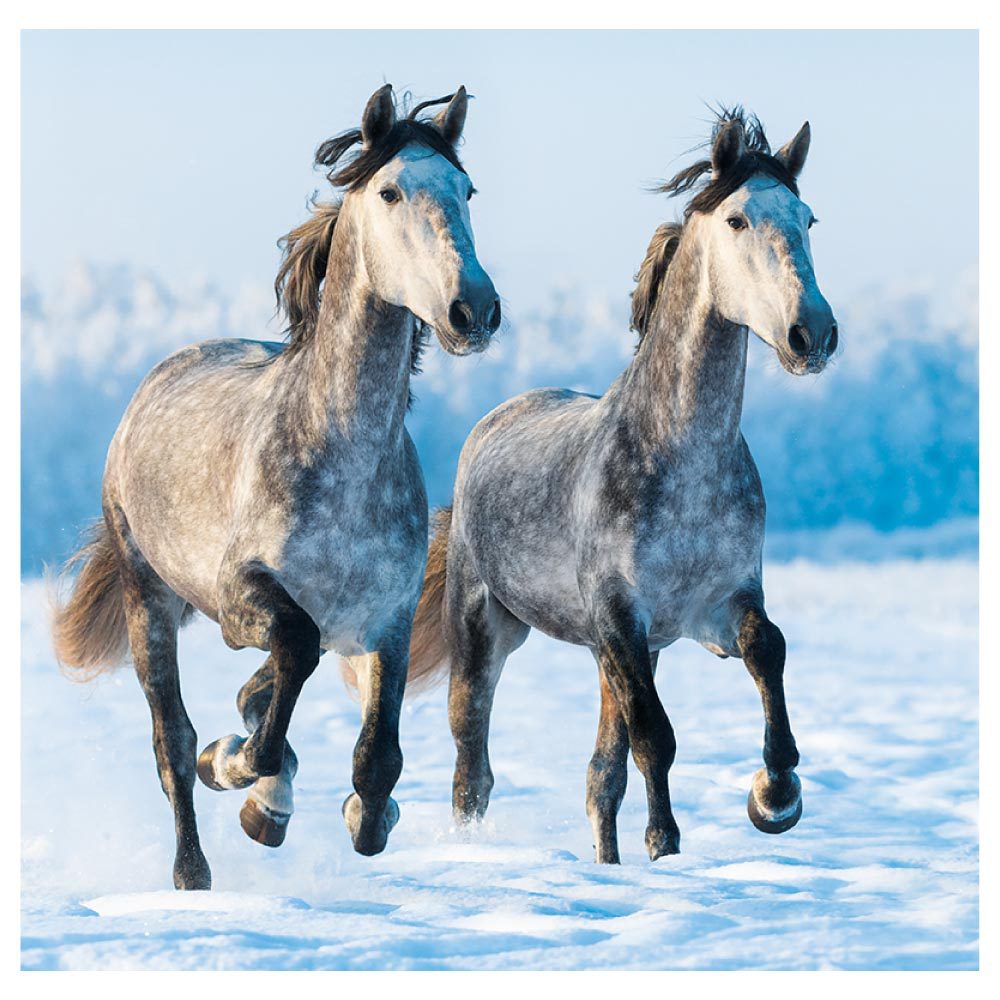

In [76]:
img = Image.open(BytesIO(uploaded['horse.jpg']))
img

# Gluon

In [23]:
!pip install mxnet-cu110
!pip install gluoncv

     |████████████████████████████████| 1.3 MB 26.4 MB/s 


In [44]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
import numpy as np
import mxnet

In [25]:
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)

88993KB [00:02, 38249.33KB/s]                           


In [81]:
x, img = data.transforms.presets.yolo.transform_test(mxnet.nd.array(img))

<Figure size 1080x1080 with 0 Axes>

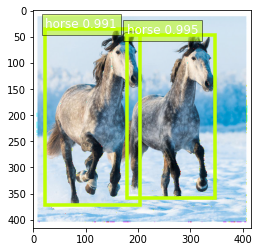

In [85]:
from matplotlib.pyplot import figure

figure(figsize=(15, 15))
ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=detector.classes)
plt.show()

# Pytorch

In [1]:
import torch
import torchvision

In [67]:
model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True) 
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [72]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0)
output = model(input_batch)['out'][0]

In [73]:
output_predictions = output.argmax(0)
output_predictions.shape

torch.Size([416, 416])

In [74]:
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize([464, 696])

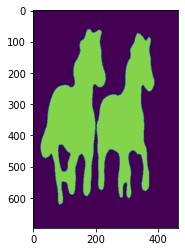

In [75]:
import matplotlib.pyplot as plt
plt.imshow(r)